<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_05/gradient_out_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 出力層の勾配
出力層における勾配を導出しましょう。  
回帰と分類で、異なる活性化関数と損失関数を使います。

## ●添字とニューロン数
それでは、数式を用いて出力層における各勾配を求めます。  
以降では、次の表のように各層におけるニューロンの添字とニューロン数を設定します。

||||
|:-:|:-:|:--|
| 層 | ニューロンの添字 | ニューロン数 |
| 入力層 | $i$ | $l$ |
| 中間層 | $j$ | $m$ |
| 出力層 | $k$ | $n$ |
||||

## ●出力層の勾配
出力層における、重みとバイアスの勾配を求めます。  
$w_{jk}$を出力層における重み、$b_k$をバイアス、$u_k$を重みと入力の積の総和にバイアスを加えた値とします。  
重みには中間層の出力が関わるので、添字はjとkの2つが必要になります。  
また、中間層のニューロンの出力を$y_j$、出力層のニューロンの出力を$y_k$とします。  

$ y_{k} = f(u_k)$

$ u_k = \displaystyle \sum_j y_j w_{jk} + b_k$

これらを図で表すと以下のようになります。  

**（図: 出力層における、単一ニューロンの順伝播）**
<br>

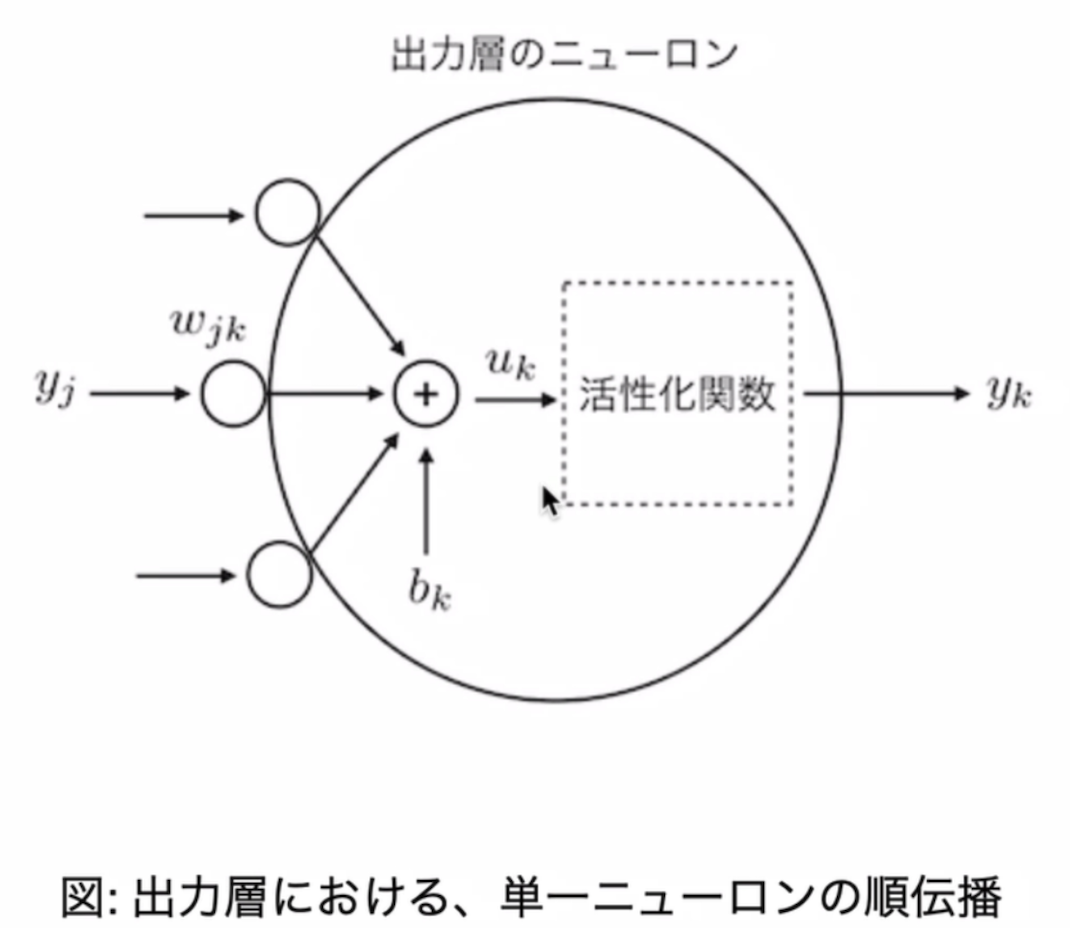


誤差は$E$とします。  

まずは重みの勾配、すなわち$\frac{\partial E}{\partial w_{jk}}$を求めます。  
以降は、重みの勾配を以下のように$\partial w_{jk}$とシンプルに記述することにします。  

$$\partial w_{jk} = \frac{\partial E}{\partial w_{jk}}$$

重みの勾配は、以前に解説した連鎖律を用いて以下のように展開できます。

（式 1）
$$ \partial w_{jk}=\frac{\partial E}{\partial w_{jk}}=\frac{\partial E}{\partial u_k}\frac{\partial u_k}{\partial w_{jk}} $$

ここで、右辺の$\frac{\partial u_k}{\partial w_{jk}}$の部分は、$y_j$が中間層の出力（出力層への入力）、$b_k$がバイアスなので次のように表せます。

（式 2）
$$ \begin{aligned} \\
\frac{\partial u_k}{\partial w_{jk}} & = \frac{\partial (\sum\limits_{q=1}^m y_q w_{qk} + b_k)}{\partial w_{jk}} \\
& = \frac{\partial}{\partial w_{jk}}(y_1 w_{1k}+y_2w_{2k}+\cdots +y_jw_{jk}+\cdots + y_mw_{mk} + b_k) \\
& = y_j
\end{aligned} $$

添字の$q$は$\Sigma$による総和のために便宜上使用しているだけなので、特に意味はありません。  
偏微分なので、$w_{jk}$がかかっている項以外は全て0になります。

（式 1）式の右辺の$\frac{\partial E}{\partial u_k}$の部分は、出力層のニューロンの出力を$y_k$とすると連鎖律により次のようになります。

$$ \frac{\partial E}{\partial u_k} = \frac{\partial E}{\partial y_k}\frac{\partial y_k}{\partial u_k} $$

すなわち、誤差を出力層のニューロンの出力で偏微分したものと、その出力を$u_k$で偏微分したものの積になります。  
前者は損失関数を偏微分することで求めることができて、後者は活性化関数を偏微分することで求めることができます。  

ここで、次のように$\delta_{k}$を設定しておきます。  

（式 3）
$$ \delta_{k} = \frac{\partial E}{\partial u_k} = \frac{\partial E}{\partial y_k}\frac{\partial y_k}{\partial u_k} $$

この$\delta_{k}$は、バイアスの勾配を求める際にも使用します。  
（式 2）と（式 3）により、（式 1）は次の形になります。

$$ \partial w_{jk}=y_j\delta_{k} $$

重みの勾配$\frac{\partial E}{\partial w_{jk}}$を、$y_j$と$\delta_{k}$の積として表すことができました。

バイアスの勾配も同様にして求めることができます。  
バイアスの勾配は、$\partial b_k$と表記します。  

$$ \partial b_k =\frac{\partial E}{\partial b_k} $$

連鎖律により以下の関係が成り立ちます。

（式 4）
$$ \partial b_k =\frac{\partial E}{\partial b_k}=\frac{\partial E}{\partial u_k}\frac{\partial u_k}{\partial b_k} $$

このとき、右辺の$\frac{\partial u_k}{\partial b_{k}}$の部分は次のようになります。  

$$ \begin{aligned} \\
\frac{\partial u_k}{\partial b_k} & = \frac{\partial (\sum\limits_{q=1}^my_qw_{qk}+b_k)}{\partial b_k} \\
& = \frac{\partial}{\partial b_k}(y_1w_{1k}+y_2w_{2k}+\cdots +y_jw_{jk}+\cdots + y_mw_{mk} + b_k) \\
& = 1
\end{aligned} $$

（式 4）における$\frac{\partial E}{\partial u_k}$の部分は、重みの勾配の場合と変わらないので、同様に$\delta_{k}$とすると、上記の結果を踏まえて（式 4）は次の形になります。

$$ \partial b_k=\delta_{k} $$

このように、バイアスの場合勾配は$\delta_{k}$に等しくなります。

以上により、重みとバイアスの勾配を、それぞれ$\delta_{k}$を用いたシンプルな式で表すことができました。

## ●出力層における入力の勾配

出力層では、1つ上の中間層における演算のために、予め$\frac{\partial E}{\partial y_j}$、すなわち中間層の出力の勾配（ = 出力層の入力の勾配）を計算しておきます。  
$\frac{\partial E}{\partial y_j}$は、以降$\partial y_j$と略記します。

$$ \partial y_j =\frac{\partial E}{\partial y_j} $$

出力層で予め計算しておいた$\partial y_j$は、中間層で重みとバイアスの勾配を求めるために使用します。

$\partial y_j$は、以前に解説した多変数の合成関数の連鎖律により、次のようにして求めます。  

（式 5）
$$ \begin{aligned} \\
\partial y_j & = \frac{\partial E}{\partial y_j} \\
& = \sum_{r=1}^n\frac{\partial E}{\partial u_r}\frac{\partial u_r}{\partial y_j} \\
\end{aligned} $$

$\frac{\partial E}{\partial u_r}\frac{\partial u_r}{\partial y_j}$を出力層の全てのニューロンで足し合わせればいいことになります。  
$u_r$は入力と重みにバイアスを足した値ですが、出力層のニューロンの数だけあります。  

添字の$r$は$\Sigma$による総和のために便宜上使用しているだけなので、特に意味はありません。    
この式において、$\frac{\partial u_r}{\partial y_j}$は次のように求めることができます。

$$ \begin{aligned} \\
\frac{\partial u_
r}{\partial y_j} & = \frac{\partial (\sum\limits_{q=1}^m y_q w_{qr} + b_r)}{\partial y_j} \\
& = \frac{\partial}{\partial y_j}(y_1w_{1r}+y_2w_{2r}+\cdots +y_jw_{jr}+\cdots + y_mw_{mr} + b_r) \\
& = w_{jr}
\end{aligned} $$

以上に加えて、$\delta_r = \frac{\partial E}{\partial u_r}$により、（式 5）は以下のようになります。

$$ \partial y_j =  \sum_{r=1}^n \delta_r w_{jr} $$

$\partial y_j$を$\delta_r$と$w_{jr}$の積の総和としてシンプルな形にまとめることができました。

## ●活性化関数と損失関数の適用 （回帰）
回帰の場合は、活性化関数に恒等関数、損失関数に二乗和誤差を使い$\delta_{k}$を求めます。  
そのためには、最初に$\delta_{k}$を求めます。  
今回は、$\delta_{k}$を求めるために（式 3）を次の形で使用します。  

（式 4）
$$ \delta_{k} =  \frac{\partial E}{\partial y_k}\frac{\partial y_k}{\partial u_k} $$

この式において、まずは$\frac{\partial E}{\partial y_k}$を求めます。  
これは、損失関数である二乗和誤差を出力$y_k$で偏微分することにより求めることができます。  

（式 5）
$$ \begin{aligned} \\
\frac{\partial E}{\partial y_k} & = \frac{\partial}{\partial y_k}(\frac{1}{2} \sum_{k}(y_k-t_k)^2) \\
& = \frac{\partial}{\partial y_k}(\frac{1}{2}(y_0-t_0)^2+\frac{1}{2}(y_1-t_1)^2+\cdots+\frac{1}{2}(y_k-t_k)^2+\cdots+\frac{1}{2}(y_n-t_n)^2) \\
& = y_k-t_k
\end{aligned} $$

係数の$\frac{1}{2}$が、2を打ち消すために活躍していますね。  
次に、$\frac{\partial y_k}{\partial u_k}$を求めます。  
これは、出力層の活性化関数を偏微分することで求めることができます。  
出力層の活性化関数は恒等関数なので、次のように求めることができます。

$$ \begin{aligned} \\
\frac{\partial y_k}{\partial u_k} & = \frac{\partial u_k}{\partial u_k} = 1
\end{aligned} $$

この式と（式 5）を用いて、（式 4）は次のようになります。

$$ \delta_{k} = y_k-t_k $$

$\delta_{k}$を求めることができました。  
これを使うと、重みの勾配、バイアスの勾配、入力の勾配は今まで求めた式により次のようになります。

$$ \delta_{k} = y_k-t_k $$
$$ \partial w_{jk}=y_j\delta_{k}  $$
$$ \partial b_k=\delta_{k} $$
$$\partial y_j = \sum_{r=1}^n \delta_r w_{jr}$$

以上により、回帰の場合の各勾配を求めることができました。

## ●活性化関数と損失関数の適用 （分類）
分類問題のケースで勾配を導出してみましょう。  
活性化関数にはソフトマックス関数、損失関数には交差エントロピー誤差を使います。  

まずは、出力層の重みの勾配を導出します。  
最初に$\delta_{k}$を求めましょう。今回は、（式 3）を次の形で使用します。  

（式 6）
$$ \delta_{k} = \frac{\partial E}{\partial u_k} $$

また、損失関数である交差エントロピー誤差と、活性化関数であるソフトマックス関数を次の形で表します。  

（式 7）
$$ E = -\sum_{k} t_k \log (y_k) $$

（式 8）
$$ y_k = \frac{\exp(u_k)}{\sum\limits_{k}\exp(u_k)} $$

ここで、$\sum\limits_{k}$は出力層の全ニューロンでの総和を意味します。  
（式 7）に（式 8）を代入すると次のようになります。  

$$ \begin{aligned}
E & = -\sum_{k}t_k \log (\frac{\exp(u_k)}{\sum\limits_{k}\exp(u_k)}) \\
\end{aligned} $$

この式は、$\log \frac{p}{q}=\log p - \log q$の関係により、次のように変形できます。

（式 9）
$$ \begin{aligned}
E & = -\sum_{k}\Bigl( t_k \log \bigl( \exp(u_k) \bigr) - t_k \log \sum\limits_{k}\exp(u_k) \Bigr) \\
& = -\sum_{k}\Bigl( t_k \log \bigl( \exp(u_k) \bigr)\Bigr) + \sum_{k} \bigl( t_k  \log\sum\limits_{k}\exp(u_k) \bigr) \\
& = -\sum_{k}\Bigl( t_k \log \bigl( \exp(u_k) \bigr)\Bigr) + \bigl( \sum_{k} t_k \bigr) \bigl( \log\sum\limits_{k}\exp(u_k) \bigr)
\end{aligned} $$

ここで、$\log (\exp(x)) = x$ であり、分類問題ではたった1つの正解値が1であとは0なので、$\sum\limits_{k} t_k = 1$となります。  
従って、式（式 9）は次のようになります。  

$$ \begin{aligned}
E & = -\sum_{k} t_k u_k + \log\sum\limits_{k}\exp(u_k)
\end{aligned} $$

これを式（式 6）に代入することで、$\delta_{k}$を求めることができます。  

$$ \begin{aligned}
\delta_{k} & = \frac{\partial E}{\partial u_k} \\
& = \frac{\partial}{\partial u_k} \bigl(  -\sum_{k} t_k u_k + \log\sum\limits_{k}\exp(u_k) \bigr) \\
& = -t_k + \frac{\exp(u_k)}{\sum\limits_{k}\exp(u_k)} \\
& = -t_k + y_k \\
& = y_k - t_k
\end{aligned}  $$

何と、$\delta_{k}$は回帰問題の場合と同じ形になりました。  
交差エントロピー誤差やソフトマックス関数は式が複雑に見えますが、分類問題も回帰問題と同様にシンプルな式で扱うことができます。  

この$\delta_{k}$を使うと、出力層において計算すべき各勾配を次のようにまとめることができます。

$$ \delta_{k}= y_k - t_k$$
$$ \partial w_{jk}=y_j\delta_{k} $$
$$ \partial b_k=\delta_{k} $$
$$ \partial y_j = \sum_{r=1}^n \delta_r w_{jr} $$

以上により、分類の場合における各勾配を求めることができました。